In [17]:
# KDD Step 1: data selection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


print("KDD Step 1: Data Selection")
# Load Dataset
df = pd.read_csv('flight_price.csv')

# Display initial dataset information
print("\nDataset Overview:")
print(df.info())
print(f"\n\nFirst 5  rows:\n {df.head()}")
print(f"\nBefore Dropping Unnamed Columns, Missing Values and Duplicates:  {df.shape}")

KDD Step 1: Data Selection

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


First 5  rows:
    Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  S


KDD step 2: data preprocessing

cleaning: 

After Dropping Unnamed Column, Missing Values and Duplicates: (300153, 11)

Handling Outliers in 'Price'...


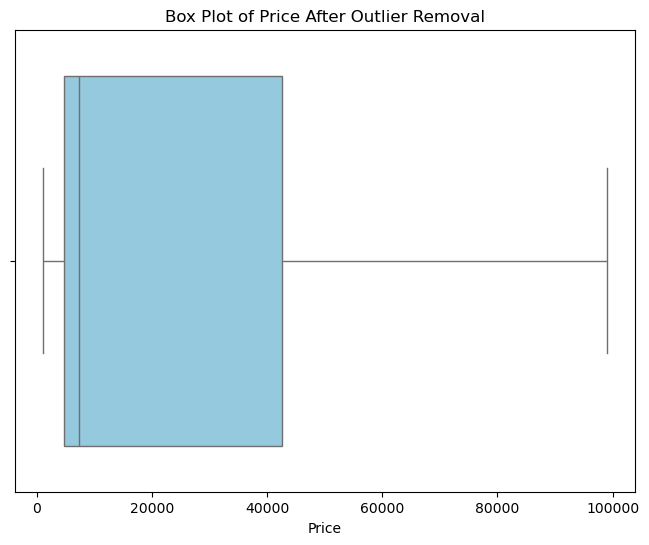

In [18]:
# KDD Step 2: data preprocessing
print("\nKDD step 2: data preprocessing")

print("\ncleaning: ")
# Drop 'Unnamed: 0' column
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore')
#Handle Missing Values and Duplicates
df = df.dropna().drop_duplicates()
print(f"\nAfter Dropping Unnamed Column, Missing Values and Duplicates: {df.shape}")

# encode categorical variables
categorical_cols = ['flight', 'airline', 'source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scale Continuous Features
scaler = StandardScaler()
numeric_cols = ['duration', 'days_left']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Handle Outliers in 'price' using IQR method
print("\nHandling Outliers in 'Price'...")
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Visualize Outliers using Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='skyblue')
plt.title("Box Plot of Price After Outlier Removal")
plt.xlabel("Price")
plt.show()

In [10]:
# KDD Step 3: data transformation
print("\nKDD step 3: data transformation")
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['price'])
y = df['price']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

print(f"Training Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")


KDD step 3: data transformation
Training Set Shape: (210021, 10), Testing Set Shape: (90009, 10)


In [11]:
# KDD step 4: modeling
print("\nKDD step 4: modeling")
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, median_absolute_error
)

# Train Linear Regression
print("\ntraining linear regression...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

#train random forest
print("\ntraining random forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=6)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# train polynomial regression
print("\ntraining polynomial regression...")
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)



KDD step 4: modeling

training linear regression...

training random forest...

training polynomial regression...


In [12]:
# KDD Step 5: evaluation
print("\nKDD step 5: evaluation")

#Function to print metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"\n{model_name} Metrics:")
    print(f"R-squared (R2 Score): {r2_score(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_true, y_pred):.2%}")
    print(f"Explained Variance Score: {explained_variance_score(y_true, y_pred):.2f}")
    print(f"Median Absolute Error: {median_absolute_error(y_true, y_pred):.2f}")

# Evaluate all models
print_metrics("Linear Regression", y_test, y_pred)
print_metrics("Random Forest", y_test, rf_pred)
print_metrics("Polynomial Regression", y_test, poly_pred)


KDD step 5: evaluation

Linear Regression Metrics:
R-squared (R2 Score): 0.91
Root Mean Squared Error (RMSE): 6926.18
Mean Absolute Error (MAE): 4601.63
Mean Absolute Percentage Error (MAPE): 43.52%
Explained Variance Score: 0.91
Median Absolute Error: 2973.73

Random Forest Metrics:
R-squared (R2 Score): 0.99
Root Mean Squared Error (RMSE): 2258.79
Mean Absolute Error (MAE): 866.78
Mean Absolute Percentage Error (MAPE): 5.91%
Explained Variance Score: 0.99
Median Absolute Error: 120.78

Polynomial Regression Metrics:
R-squared (R2 Score): 0.94
Root Mean Squared Error (RMSE): 5583.46
Mean Absolute Error (MAE): 3490.92
Mean Absolute Percentage Error (MAPE): 27.54%
Explained Variance Score: 0.94
Median Absolute Error: 1973.77


C:\installed\programs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\installed\programs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\installed\programs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



KDD step 6: Interpretation and Visualizations


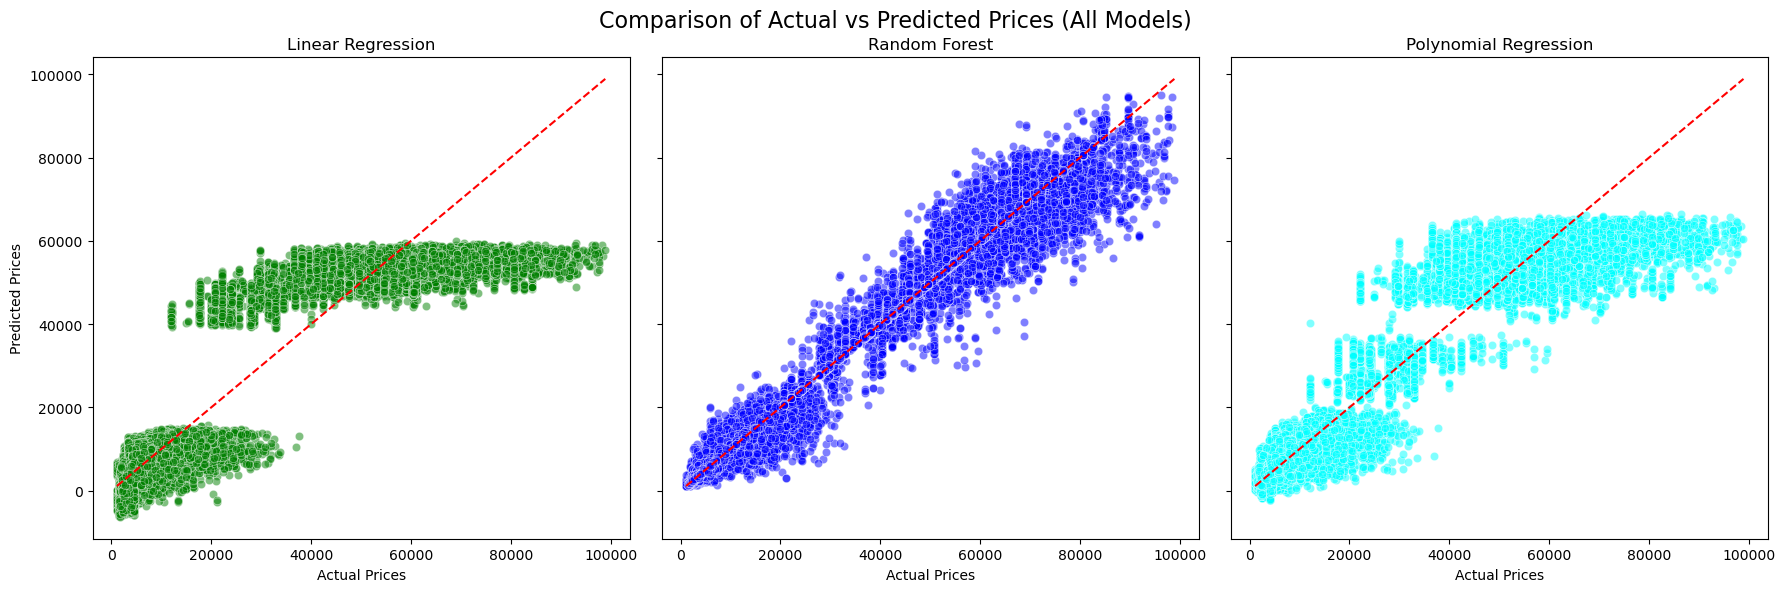

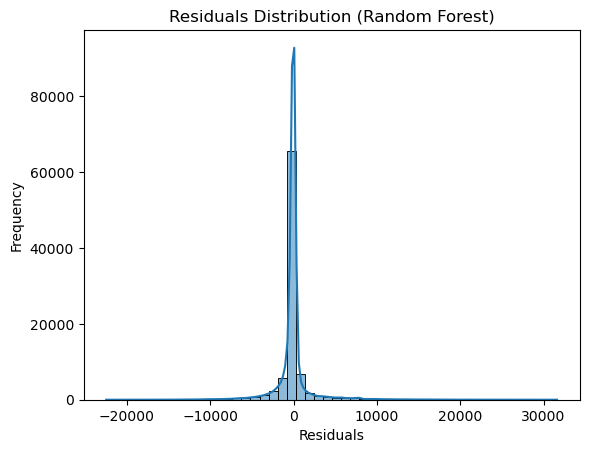

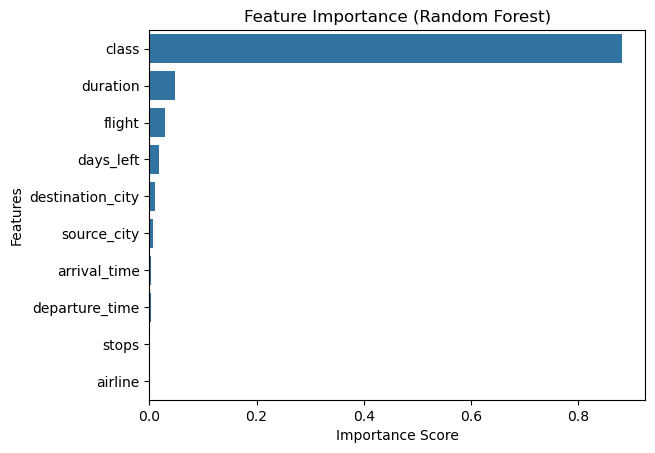

In [13]:
# KDD Step 6: Interpretation and Visualizations
print("\nKDD step 6: Interpretation and Visualizations")

# Compare Actual vs Predicted Prices (Subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Subplot 1: Linear Regression
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='green', ax=axes[0])
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
             color='red', linestyle='--', ax=axes[0])
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")

# Subplot 2: Random Forest
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.5, color='blue', ax=axes[1])
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
             color='red', linestyle='--', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Actual Prices")

# Subplot 3: Polynomial Regression
sns.scatterplot(x=y_test, y=poly_pred, alpha=0.5, color='cyan', ax=axes[2])
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
             color='red', linestyle='--', ax=axes[2])
axes[2].set_title("Polynomial Regression")
axes[2].set_xlabel("Actual Prices")

# Overall Title and Layout Adjustment
fig.suptitle("Comparison of Actual vs Predicted Prices (All Models)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# Residual Analysis for Random Forest
residuals = y_test - rf_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Feature Importance for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
